#01. Importing libraries
--

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os

#02. Importing data file "products.csv" from original
--

In [2]:
#set path
path = r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 4\Instacart Basket Analysis"

In [3]:
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '4.3_orders_products', 'products.csv'), index_col = False)

In [4]:
#check 
df_prods 

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3
...,...,...,...,...,...
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7


#03. Importing data file "orders_wrangled.csv"
--

In [5]:
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '4.4_orders_wrangled.csv'), index_col = False)

In [6]:
#check
df_ords.describe()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710541e+06,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552705e+05,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710541e+06,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421082e+06,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [7]:
#!!check shows wrangeled data was'nt saved as I thought it would: 
#a new column 'unnamed:0' is observed but unknown 
#order_id and user_id were not saved as object strings as performed prior to exporting in 4.4!!
#eval_set also was not dropped

Check orders_wrangled: Data Accuracy and Consistency  
--

In [8]:
#column check for consistency: pass, fail, N/A
#order_id - pass: primary key for df; each value is unique
#user_id - pass: 206,209 unique users
#!! eval_set - N/A: 'str'; key to eval data sets 
#order_number - fail: 100 values seems wrong, need data description
#days_of_week - pass: 7 values (sat-fri) are expected; 2nd quartile is 3 
#order_hour_of_day - pass: 24 hours are expected; median is 13 (i think this checks out)

In [9]:
df_ords.dtypes

Unnamed: 0                  int64
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [10]:
df_ords

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order
0,0,2539329,1,prior,1,2,8,NaN
1,1,2398795,1,prior,2,3,7,15.0
2,2,473747,1,prior,3,3,12,21.0
3,3,2254736,1,prior,4,4,7,29.0
4,4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...,...
3421078,3421078,2266710,206209,prior,10,5,18,29.0
3421079,3421079,1854736,206209,prior,11,4,10,30.0
3421080,3421080,626363,206209,prior,12,1,12,18.0
3421081,3421081,2977660,206209,prior,13,1,12,7.0


In [11]:
print(df_ords['order_number'].value_counts())

1      206209
2      206209
3      206209
4      206209
5      182223
        ...  
96       1592
97       1525
98       1471
99       1421
100      1374
Name: order_number, Length: 100, dtype: int64


In [12]:
print(df_ords['order_hour_of_day'].median())

13.0


<Axes: ylabel='Frequency'>

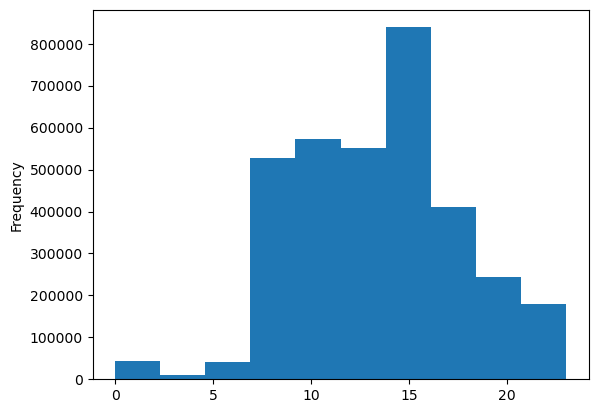

In [13]:
df_ords['order_hour_of_day'].plot.hist()


#04. Mixed Type Columns
--

In [14]:
# creates a new dataframe
df_test = pd.DataFrame()

In [15]:
# creates a new column, mix, within df_test and fills it with  string, numeric, and boolean values.
df_test['mix'] = ['a', 'b', 1, True]

In [16]:
df_test.head()

,mix
0,a
1,b
2,1
3,True


In [17]:
df_test.dtypes

mix    object
dtype: object

In [18]:
#checking whether a dataframe contains any mixed-type columns
#for loop: for these elements... do this
#boolean condition checks for data type consistency 
#if statement checks boolean condition (0=Fasle, 1=True)
for col in df_test.columns.tolist():     
  weird = (df_test[[col]].applymap(type) != df_test[[col]].iloc[0].apply(type)).any(axis = 1) 
  if len (df_test[weird]) > 0:
    print (col)

mix


In [19]:
#!! always change mix type to best fit data type regarding analysis etc. to avoid code malfunction during analysis
df_test['mix'] = df_test['mix'].astype('str')

In [20]:
#check
df_test.dtypes

mix    object
dtype: object

#05. Missing Values
--
Step 1 check for nulls

In [21]:
#check all columns for null
df_prods.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

In [22]:
#checking one column
df_prods['product_name'].isnull().sum()

16

In [23]:
#create a new dataframe (subset) of null values
df_nan = df_prods[df_prods['product_name'].isnull() == True]

In [24]:
df_nan

,product_id,product_name,aisle_id,department_id,prices
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


#05. Missing Values
--
Step 2  Options for handling null values

In [25]:
#do nothing
#impute mean: df['column with missings'].fillna(mean value, inplace=True)
#impute median: df['column with missings'].fillna(median value, inplace=True)
#linear interpolation
#remove nulls from all columns: df_prods.dropna(inplace = True) #!!(inplace = False) is the default command and would create a view only, does not overwrite data frame.
#remove nulls from one column: df_prods.dropna(subset = [‘product_name’], inplace = True)
#create new frame w/out nulls from one column: df_prods_clean = df_prods[df_prods['product_name'].isnull() == False]

In [26]:
#before removing nulls, call shape to compare with new data frame
df_prods.shape

(49693, 5)

In [27]:
#removing nulls into new data frame
df_prods_clean = df_prods[df_prods['product_name'].isnull() == False]

In [28]:
#check shows 16 rows have been removed
df_prods_clean.shape

(49677, 5)

#05. Duplicates
--

In [29]:
#create subset with duplicates
df_dups = df_prods_clean[df_prods_clean.duplicated()]

In [30]:
#check shows duplicates are present
df_dups

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


In [31]:
#create new subset without duplicates 
df_prods_clean_no_dups = df_prods_clean.drop_duplicates()

In [32]:
#check compare to cleaned subset
df_prods_clean_no_dups.shape


(49672, 5)

In [33]:
df_prods_clean_no_dups.to_csv(os.path.join(path, '02 Data','Prepared Data', '4.5_df_prods_clean.csv'), index = False)